In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
from manipulate_image import numpy_to_pic, pic_to_numpy
from image_process import contrast_streching, histogram_equalization, adaptive_equalization
from skimage import img_as_float, exposure
from skimage import color, io
from Histogram import pic_histo

In [130]:
img = Image.open('UCL.jpg').convert('L')
img.save('UCL_gray.jpg')
gray_array = pic_to_numpy('UCL_gray.jpg')
array= pic_to_numpy('UCL.jpg')

In [124]:
contrast = contrast_streching(gray_array)
img_adapteq = adaptive_equalization(gray_array)
hist = histogram_equalization(gray_array)

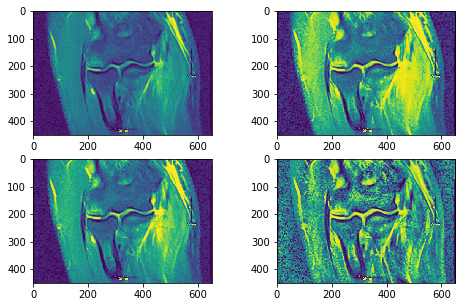

In [156]:
fig = plt.figure(figsize=(8, 5))
plt.subplot(2,2,1)
plt.imshow(gray_array)
plt.subplot(2,2,2)
plt.imshow(hist)
plt.subplot(2,2,3)
plt.imshow(contrast)
plt.subplot(2,2,4)
plt.imshow(img_adapteq)
plt.savefig('histogram_pics.png')

/home/kmc97/ImageProcessorS18/env/lib/python3.5/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


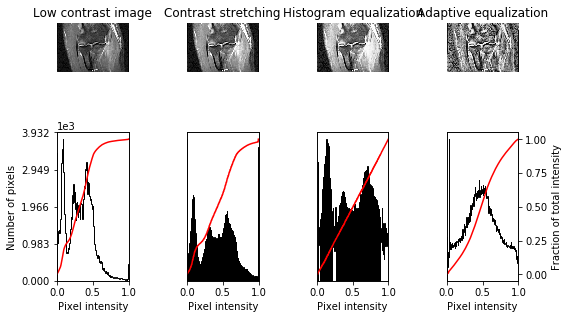

In [154]:
# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = pic_histo(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = pic_histo(contrast, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = pic_histo(hist, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = pic_histo(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.savefig('fig.png')
plt.show()